# First steps in Data Science

Does money make people happier?

# Setup

In [2]:
# Common imports
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

# A simple Model

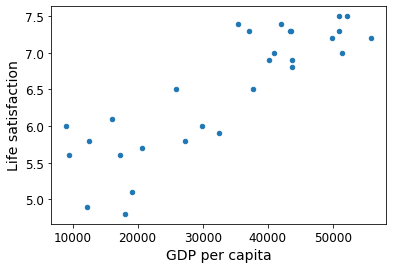

[[7.30882509]]


In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model

# Load the data from GitHub

LINK = "https://raw.githubusercontent.com/kirenz/datasets/master/oecd_gdp.csv"

df = pd.read_csv(LINK)

# Visualize the data
df.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')
plt.show()

# Prepare the data
X = np.c_[df["GDP per capita"]]
y = np.c_[df["Life satisfaction"]]

# Select a linear regression model
model = sklearn.linear_model.LinearRegression()

# Train the model
model.fit(X, y)

# Make a prediction for a new GDP value
X_new = [[50000]]  # new GDP per capita
print(model.predict(X_new)) 


In [5]:
import sklearn.neighbors

model_knn = sklearn.neighbors.KNeighborsRegressor(n_neighbors=3)

model_knn.fit(X,y)

X_new_knn = [[50000]]
print(model_knn.predict(X_new_knn)) 

[[7.33333333]]
